In [1]:
!python3 -m pip install Tweepy
!python3 -m pip install pandas
!pip install nltk
!pip install textblob
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
nltk.download('words')
nltk.download("stopwords")
nltk.download('omw-1.4')


!pip install wordcloud

!pip install textblob
nltk.download('vader_lexicon')


!pip install keras
!pip install xgboost
!pip install tensorflow


Successful Authentication


In [34]:
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from textblob import Word
import tweepy
import pandas as pd
import os
import datetime


import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


In [11]:
api_key = "xx"
api_key_secret = "xx"
access_key = "xx-xx"
access_key_secret = "xx"
        

auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_key,access_key_secret)
api = tweepy.API(auth,wait_on_rate_limit = True)

try:
    api.verify_credentials()
    print('Successful')
except:
    print('Failed')

Successful


In [12]:
df = pd.DataFrame(columns=['text', 'screen_name', 'created_at', 'favorite_count', 'id'])
msgs = []
msg =[]

ids = set()
for tweet in tweepy.Cursor(api.search_tweets, q='#war -filter:retweets',
                           lang='en', until = '2022-09-17').items(1500):
    msg = [tweet.text, tweet.user.screen_name, tweet.created_at, tweet.favorite_count, tweet.id] 
    msg = tuple(msg)                    
    msgs.append(msg)
    ids.add(tweet.id) # add new id
    
    
print ("number of unique ids seen so far: {}",format(len(ids)))
df = pd.DataFrame(msgs)
df.columns = ['text', 'screen_name', 'created_at', 'favorite_count', 'id']

number of unique ids seen so far: {} 1500


## tweet çekmeden aşagıdan devam edilebilir

In [13]:
df.to_csv('17EylülEnData.csv')

In [5]:
file_names = ['test8eyllbmerged.csv', '17eylüldata.csv']
data_all = pd.concat((pd.read_csv(i) for i in file_names)).reset_index(drop = True)
data_all.to_csv('17EylülEnData.csv')

In [16]:
data2 = df
data2_text = data2['text']
print(data2_text.head())

0    What #Russia left behind in the #Ukraine. #war...
1    In the #war between #Burmese #Militaries and #...
2    In the #war between #Burmese #Militaries and #...
3    In the #war between #Burmese #Militaries and #...
4    "The pace and non-stop action will sometimes m...
Name: text, dtype: object


In [66]:
print(data2.head())
data2.to_csv('17EylülEnDataYedek.csv')

                                                text    screen_name  \
0  russia left behind ukraine soldier death bury ...   txcremations   
1  burmese military aa myanmar army fired three m...   RoMonSurAli3   
2  burmese military aa myanmar army fired three m...   RoMonSurAli3   
3  burmese military aa myanmar army fired three m...   RoMonSurAli3   
4  pace nonstop action sometimes make pause catch...  eevalancaster   

                 created_at  favorite_count                   id  polarity  \
0 2022-09-16 23:59:54+00:00               0  1570925473936592898  0.033333   
1 2022-09-16 23:50:07+00:00               9  1570923012286971904 -0.100000   
2 2022-09-16 23:49:45+00:00               5  1570922919966167040 -0.100000   
3 2022-09-16 23:45:27+00:00               9  1570921839064678400 -0.100000   
4 2022-09-16 23:38:59+00:00               0  1570920211934740480  0.100000   

   subjectivity sentiment  neg  neu  pos  compound  
0      0.483333  negative  NaN  NaN  NaN       NaN 

In [6]:
data1 = pd.read_csv('test17eyllbmerged.csv')
data1_text = data1['text']
print(data1_text.head())

0    Kocaeli'de 2 minibüs çarpıştı: 11 yaralı\n #Ko...
1    @hakan_191919 @1917_Bolsevik @Sonsuzluk__1938 ...
2    Üçte biri sular altında kalan #pakistan ın yar...
3    Con-Ro tipi gemi Türkiye-Çin arasında çalışaca...
4    #Istanbul Eyl. 02 00:50 Sıcaklık 25C az bulutl...
Name: text, dtype: object


In [17]:
data_1_2 = pd.concat([data1_text, data2_text],  axis=0)
print(data_1_2.head())

0    Kocaeli'de 2 minibüs çarpıştı: 11 yaralı\n #Ko...
1    @hakan_191919 @1917_Bolsevik @Sonsuzluk__1938 ...
2    Üçte biri sular altında kalan #pakistan ın yar...
3    Con-Ro tipi gemi Türkiye-Çin arasında çalışaca...
4    #Istanbul Eyl. 02 00:50 Sıcaklık 25C az bulutl...
Name: text, dtype: object


In [18]:
data_1_2.to_csv('merged8eylul.csv')

In [22]:
df = pd.read_csv("merged8eylul.csv",delimiter=',')
print(df.head())

   Unnamed: 0                                               text
0           0  Kocaeli'de 2 minibüs çarpıştı: 11 yaralı\n #Ko...
1           1  @hakan_191919 @1917_Bolsevik @Sonsuzluk__1938 ...
2           2  Üçte biri sular altında kalan #pakistan ın yar...
3           3  Con-Ro tipi gemi Türkiye-Çin arasında çalışaca...
4           4  #Istanbul Eyl. 02 00:50 Sıcaklık 25C az bulutl...


In [76]:
df = data2

## veri temizligi

In [68]:
#buyuk-kucuk donusumu
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#noktalama işaretleri
df['text'] = df['text'].str.replace('[^\w\s]','')

#sayılar
df['text'] = df['text'].str.replace('\d','')

#stopwords
#sw = stopwords.words('turkish')
sw = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

#lemmi
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

/tmp/ipykernel_4441/1685017769.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s]','')
/tmp/ipykernel_4441/1685017769.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('\d','')


In [69]:
df.head()
#df.to_csv('trainclear.csv')

,text,screen_name,created_at,favorite_count,id,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,russia left behind ukraine soldier death bury ...,txcremations,2022-09-16 23:59:54+00:00,0,1570925473936592898,0.033333,0.483333,negative,NaN,NaN,NaN,NaN
1,burmese military aa myanmar army fired three m...,RoMonSurAli3,2022-09-16 23:50:07+00:00,9,1570923012286971904,-0.100000,0.100000,negative,NaN,NaN,NaN,NaN
2,burmese military aa myanmar army fired three m...,RoMonSurAli3,2022-09-16 23:49:45+00:00,5,1570922919966167040,-0.100000,0.100000,negative,NaN,NaN,NaN,NaN
3,burmese military aa myanmar army fired three m...,RoMonSurAli3,2022-09-16 23:45:27+00:00,9,1570921839064678400,-0.100000,0.100000,negative,NaN,NaN,NaN,NaN
4,pace nonstop action sometimes make pause catch...,eevalancaster,2022-09-16 23:38:59+00:00,0,1570920211934740480,0.100000,0.100000,neutral,0.0,1.0,0.0,0.0


In [49]:
#seyrek kelimeleri belirliyorum ve data dan siliyorum

textss = " ".join(df['text'])
textss = textss.split()
print(len(textss))

16088


In [50]:
freqquency = pd.Series(textss).value_counts()

In [27]:
freqquency = freqquency[:1]
print(freqquency)

In [30]:
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freqquency))
print(df.head())

                                                text    screen_name  \
0  russia left behind ukraine soldier death bury ...   txcremations   
1  burmese military aa myanmar army fired three m...   RoMonSurAli3   
2  burmese military aa myanmar army fired three m...   RoMonSurAli3   
3  burmese military aa myanmar army fired three m...   RoMonSurAli3   
4  pace nonstop action sometimes make pause catch...  eevalancaster   

                 created_at  favorite_count                   id  
0 2022-09-16 23:59:54+00:00               0  1570925473936592898  
1 2022-09-16 23:50:07+00:00               9  1570923012286971904  
2 2022-09-16 23:49:45+00:00               5  1570922919966167040  
3 2022-09-16 23:45:27+00:00               9  1570921839064678400  
4 2022-09-16 23:38:59+00:00               0  1570920211934740480  


In [54]:
freqquency = pd.Series(textss).value_counts()
freqquency = freqquency[-35:]
print(freqquency)

young                 1
greedy                1
httpstcobikulizqb     1
jimi                  1
bhadrapunchline       1
httpstcobgmdfykdd     1
httpstcozewowomk      1
httpstcoqimvjkpa      1
httpstcotgcqqeynw     1
httpstcohmjonolzl     1
destafistum           1
httpstcoemgjlout      1
httpstcocpsosodzgy    1
lyinginstate          1
blocked               1
westminster           1
httpstcopdembjbxhd    1
httpstcomsyobcsh      1
hendrix               1
exciting              1
eric                  1
burdon                1
london                1
club                  1
ronnie                1
httpstcofupzlobb      1
eeanewsletter         1
editorial             1
pandemic              1
httpstcotnbwszi       1
brics                 1
oekraine              1
httpstcoedhoppik      1
robot                 1
httpstcohwzqeghka     1
dtype: int64


In [55]:
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freqquency))
print(df.head())

                                                text    screen_name  \
0  russia left behind ukraine soldier death bury ...   txcremations   
1  burmese military aa myanmar army fired three m...   RoMonSurAli3   
2  burmese military aa myanmar army fired three m...   RoMonSurAli3   
3  burmese military aa myanmar army fired three m...   RoMonSurAli3   
4  pace nonstop action sometimes make pause catch...  eevalancaster   

                 created_at  favorite_count                   id  polarity  \
0 2022-09-16 23:59:54+00:00               0  1570925473936592898  0.033333   
1 2022-09-16 23:50:07+00:00               9  1570923012286971904 -0.100000   
2 2022-09-16 23:49:45+00:00               5  1570922919966167040 -0.100000   
3 2022-09-16 23:45:27+00:00               9  1570921839064678400 -0.100000   
4 2022-09-16 23:38:59+00:00               0  1570920211934740480  0.100000   

   subjectivity sentiment  neg  neu  pos  compound  
0      0.483333  negative  NaN  NaN  NaN       NaN 

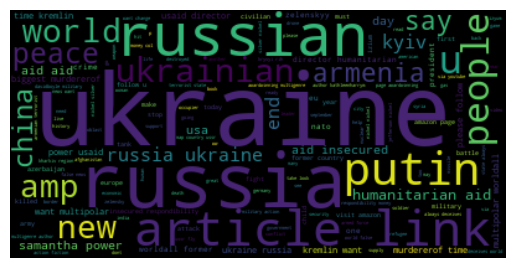

In [35]:
text = " ".join(df['text'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

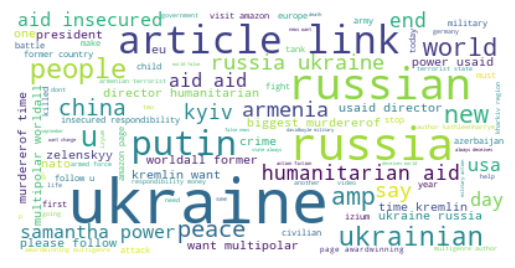

In [36]:
wordcloud = WordCloud(max_font_size = 50,
                     max_words = 100, 
                     background_color = "white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [37]:
wordcloud.to_file("kelime_bulutu.png");

In [63]:
df_yedek = df
print(df_yedek.head())

                                                text   screen_name  \
0  russia left behind ukraine soldier death bury ...  txcremations   
1  burmese military aa myanmar army fired three m...  RoMonSurAli3   
2  burmese military aa myanmar army fired three m...  RoMonSurAli3   
3  burmese military aa myanmar army fired three m...  RoMonSurAli3   
6  ukraine russian retreat expose military weakne...  IdeallyaNews   

                 created_at  favorite_count                   id  polarity  \
0 2022-09-16 23:59:54+00:00               0  1570925473936592898  0.033333   
1 2022-09-16 23:50:07+00:00               9  1570923012286971904 -0.100000   
2 2022-09-16 23:49:45+00:00               5  1570922919966167040 -0.100000   
3 2022-09-16 23:45:27+00:00               9  1570921839064678400 -0.100000   
6 2022-09-16 23:23:55+00:00               0  1570916419457384449 -0.066667   

   subjectivity sentiment  neg  neu  pos  compound  
0      0.483333  negative  NaN  NaN  NaN       NaN  
1   

In [90]:

!pip install tensorflow

     |████████████████████████████████| 578.1 MB 45 kB/s  eta 0:00:01    |███                             | 53.9 MB 2.5 MB/s eta 0:03:27
     |████████████████████████████████| 65 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 123 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 5.9 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 14.1 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 2.6 MB/s eta 0:00:01


In [91]:
from textblob import TextBlob
import sys
import os
import re
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, numpy, textblob, xgboost, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers


from warnings import filterwarnings
filterwarnings('ignore')

2022-09-17 17:16:18.572690: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-17 17:16:18.741127: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-17 17:16:18.741144: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-17 17:16:18.764302: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-17 17:16:19.290474: W tensorflow/stream_executor/platform/de

In [56]:
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

In [57]:
#Calculating Negative, Positive, Neutral and Compound values

df[['polarity', 'subjectivity']] = df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df['text'].iteritems():
     score = SentimentIntensityAnalyzer().polarity_scores(row)
     neg = score['neg']
     neu = score['neu']
     pos = score['pos']
     comp = score['compound']
     if neg > pos:
            df.loc[index, 'sentiment'] = "negative"
     elif pos > neg:
            df.loc[index, 'sentiment'] = "positive"
     else:
             df.loc[index, 'sentiment'] = "neutral"
             df.loc[index, 'neg'] = neg
             df.loc[index, 'neu'] = neu
             df.loc[index, 'pos'] = pos
             df.loc[index, 'compound'] = comp

df.head(10)

,text,screen_name,created_at,favorite_count,id,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,russia left behind ukraine soldier death bury ...,txcremations,2022-09-16 23:59:54+00:00,0,1570925473936592898,0.033333,0.483333,negative,NaN,NaN,NaN,NaN
1,burmese military aa myanmar army fired three m...,RoMonSurAli3,2022-09-16 23:50:07+00:00,9,1570923012286971904,-0.100000,0.100000,negative,NaN,NaN,NaN,NaN
2,burmese military aa myanmar army fired three m...,RoMonSurAli3,2022-09-16 23:49:45+00:00,5,1570922919966167040,-0.100000,0.100000,negative,NaN,NaN,NaN,NaN
3,burmese military aa myanmar army fired three m...,RoMonSurAli3,2022-09-16 23:45:27+00:00,9,1570921839064678400,-0.100000,0.100000,negative,NaN,NaN,NaN,NaN
4,pace nonstop action sometimes make pause catch...,eevalancaster,2022-09-16 23:38:59+00:00,0,1570920211934740480,0.100000,0.100000,neutral,0.0,1.0,0.0,0.0
5,determination win battle soviet army land s fi...,SelfPubShowcase,2022-09-16 23:30:10+00:00,0,1570917994557218818,0.800000,0.400000,positive,NaN,NaN,NaN,NaN
6,ukraine russian retreat expose military weakne...,IdeallyaNews,2022-09-16 23:23:55+00:00,0,1570916419457384449,-0.066667,0.066667,negative,NaN,NaN,NaN,NaN
7,situation armenia azerbayjan httpstcoqjknxhxds,arssdev,2022-09-16 23:23:18+00:00,0,1570916264213893120,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
8,fake account scroll back week obvious httpstco...,angel_ponders,2022-09-16 23:22:58+00:00,0,1570916183217676289,-0.166667,0.500000,negative,NaN,NaN,NaN,NaN
9,captured occupier clean garbage stele kupyansk...,voron_andrej,2022-09-16 23:20:38+00:00,4,1570915592215072769,0.366667,0.700000,positive,NaN,NaN,NaN,NaN


In [58]:
df.to_csv('17EylülEnDataWithSentiment.csv')

In [77]:
data = df[(df.sentiment == "negative") | (df.sentiment == "positive")]
data.head()

,text,screen_name,created_at,favorite_count,id,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,russia left behind ukraine soldier death bury ...,txcremations,2022-09-16 23:59:54+00:00,0,1570925473936592898,0.033333,0.483333,negative,NaN,NaN,NaN,NaN
1,burmese military aa myanmar army fired three m...,RoMonSurAli3,2022-09-16 23:50:07+00:00,9,1570923012286971904,-0.100000,0.100000,negative,NaN,NaN,NaN,NaN
2,burmese military aa myanmar army fired three m...,RoMonSurAli3,2022-09-16 23:49:45+00:00,5,1570922919966167040,-0.100000,0.100000,negative,NaN,NaN,NaN,NaN
3,burmese military aa myanmar army fired three m...,RoMonSurAli3,2022-09-16 23:45:27+00:00,9,1570921839064678400,-0.100000,0.100000,negative,NaN,NaN,NaN,NaN
5,determination win battle soviet army land fiel...,SelfPubShowcase,2022-09-16 23:30:10+00:00,0,1570917994557218818,0.800000,0.400000,positive,NaN,NaN,NaN,NaN


In [78]:
data.groupby("sentiment").count()

,text,screen_name,created_at,favorite_count,id,polarity,subjectivity,neg,neu,pos,compound
sentiment,,,,,,,,,,,
negative,551,551,551,551,551,551,551,0,0,0,0
positive,460,460,460,460,460,460,460,0,0,0,0


In [79]:
dfx = pd.DataFrame()
dfx["text"] = data["text"]
dfx["label"] = data["sentiment"]

In [80]:
dfx.head()

,text,label
0,russia left behind ukraine soldier death bury ...,negative
1,burmese military aa myanmar army fired three m...,negative
2,burmese military aa myanmar army fired three m...,negative
3,burmese military aa myanmar army fired three m...,negative
5,determination win battle soviet army land fiel...,positive


In [82]:
dfx.iloc[0]

text     russia left behind ukraine soldier death bury ...
label                                             negative
Name: 0, dtype: object

In [84]:
df = dfx   #dfx yedek

In [93]:
train_x, test_x, train_y, test_y = model_selection.train_test_split(df["text"],
                                                                   df["label"], 
                                                                    random_state = 1)

print(train_y[0:15])

436     negative
219     negative
1167    negative
462     negative
712     negative
1407    negative
816     negative
1329    positive
1234    negative
166     negative
1090    negative
257     negative
26      negative
1317    negative
731     positive
Name: label, dtype: object


In [94]:
encoder = preprocessing.LabelEncoder()

In [95]:
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

In [96]:
train_y[0:5]

array([0, 0, 0, 0, 0])

In [97]:
test_y[0:5]

array([0, 0, 1, 1, 0])

 ## count vector

In [98]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

CountVectorizer()

In [99]:
x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)

In [100]:
x_train_count.head()

AttributeError: head not found

In [101]:
vectorizer.get_feature_names()[0:5]

['aa', 'ab', 'abaerbock', 'abandoned', 'ability']

In [102]:
x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## lojistik regresyon count vector

In [103]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(x_train_count, train_y)
accuracy = model_selection.cross_val_score(loj_model, 
                                           x_test_count, 
                                           test_y, 
                                           cv = 10).mean()

print("Count Vectors Doğruluk Oranı:", accuracy)

Count Vectors Doğruluk Oranı: 0.7235384615384615


In [114]:
yeni_yorum = pd.Series("war must end")
v = CountVectorizer()
v.fit(train_x)
yeni_yorum = v.transform(yeni_yorum)

In [115]:
loj_model.predict(yeni_yorum)

array([0])